In [ ]:
%pip install yfinance

# Statistical Related Risk: Volatility & Statistical Related Risk: Correlation:

Statistical Related Risk refers to the risk associated with the use of statistical models in finance. It encompasses two types of risks: Volatility risk and Correlation risk. Volatility risk is the risk associated with fluctuations in the price or returns of financial assets. Correlation risk refers to the risk of changes in the relationship between the returns of two or more assets. The use of statistical models to predict volatility and correlation can be limited by factors such as data quality, model accuracy, and changing market conditions, making it important to regularly evaluate and adjust these models to account for these limitations.

**Volatility** refers to the degree of price variation of a financial instrument or a portfolio of financial instruments over time. It is a measure of the uncertainty of the price movements and the potential for large price changes. High volatility can result in significant losses for investors and traders, and it is an important factor to consider in financial modeling and risk management.
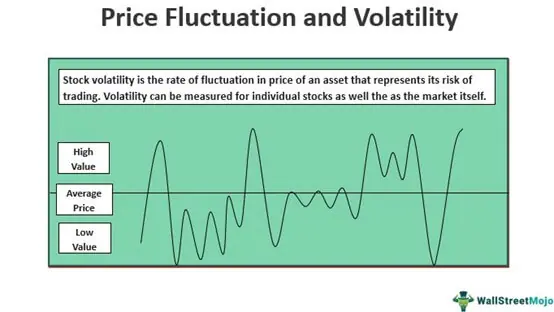

**Correlation** refers to the relationship between two or more financial instruments and their price movements. Positive correlation means that the prices of the instruments tend to move in the same direction, while negative correlation means they tend to move in opposite directions. Understanding the correlation between financial instruments is important in portfolio construction and risk management, as it can help investors and traders diversify their portfolios and reduce their overall risk.

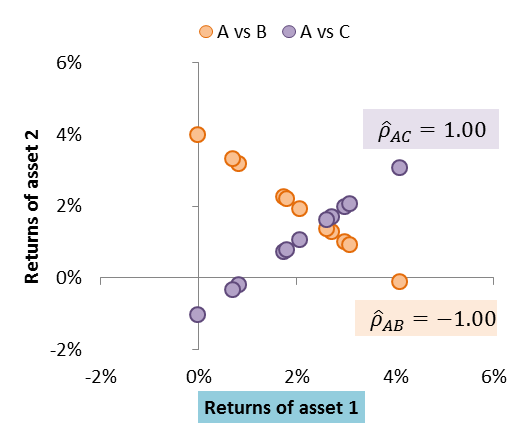

To calculate the Volatility and Correlation of financial instruments, there are several formulas commonly used in financial engineering:

1.   Volatility: One of the most widely used measures of volatility is the historical standard deviation of the returns of the financial instrument. The formula for historical standard deviation is:

$$σ = \sqrt{∑\frac{(Ri - μ)^2}{n}}$$

> **Where:** σ = standard deviation, Ri = return for period i, μ = mean return, n = number of periods

2.   Correlation: The formula for the Pearson correlation coefficient is:

$$ρ = \frac{cov(X, Y)}{(σ_{x} * σ_{y})}$$

> **Where:** ρ = Pearson correlation coefficient, cov(X, Y) = covariance between X and Y, σx = standard deviation of X, σy = standard deviation of Y

**Note:** X and Y are two financial instruments being compared. The Pearson correlation coefficient ranges from -1 to 1, with -1 indicating a perfect negative correlation, 1 indicating a perfect positive correlation, and 0 indicating no correlation.

Diagrams can help to visualize and understand Volatility and Correlation. Here are two commonly used diagrams:

1. Volatility: A common way to visualize volatility is to plot the returns of a financial instrument over time and use the plot to calculate the standard deviation. Another way to visualize volatility is to plot the Implied Volatility Smile, which shows the implied volatility of options of a financial instrument as a function of their strike price. The Implied Volatility Smile can give insight into the market's expectations of future volatility. Below is the bar plot for comparing Volatility between SPY (S&P 500) and QQQ (Nasdaq 100) ETFs. QQQ is more volatile compared to SPY and hence is more risky.

[*********************100%***********************]  5 of 5 completed


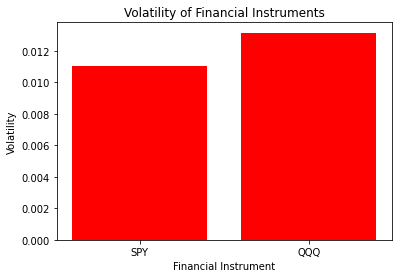

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

# Load financial instrument data into a pandas dataframe
data = yf.download('SPY QQQ GLD DX-Y.NYB GC=F', '2011-01-01', '2022-12-31')['Adj Close']

# Calculate the returns for each instrument
data["SPY_pct_chg"] = data["SPY"].pct_change()
data["QQQ_pct_chg"] = data["QQQ"].pct_change()
data["GLD_pct_chg"] = data["GLD"].pct_change()
data["DXY_pct_chg"] = data["DX-Y.NYB"].pct_change()
data["GCF_pct_chg"] = data["GC=F"].pct_change()

# Calculate the standard deviation of returns for each instrument
instrument_1_volatility = data["SPY_pct_chg"].std()
instrument_2_volatility = data["QQQ_pct_chg"].std()

# Plot the bar plot
plt.bar(["SPY", "QQQ"], [instrument_1_volatility, instrument_2_volatility], color="red")

# Add labels and title
plt.xlabel("Financial Instrument")
plt.ylabel("Volatility")
plt.title("Volatility of Financial Instruments")

# Show the plot
plt.show()

Below is a bar plot comparing the Cumulative return between SPY and QQQ, apparently the **more risky an asset** is the **more is the return**.

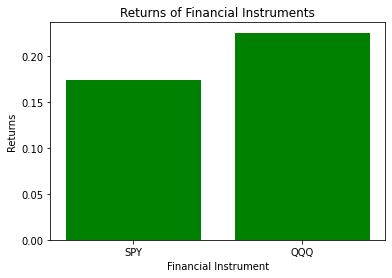

In [ ]:
# Calculate the cumulative product of daily returns
data["SPY_cumulative_returns"] = (1 + data["SPY_pct_chg"]).cumprod()
data["QQQ_cumulative_returns"] = (1 + data["QQQ_pct_chg"]).cumprod()

# Raise the cumulative product to the power of 365/number of days
number_of_days = len(data)
annual_spy_return = data["SPY_cumulative_returns"][-1] ** (365/number_of_days) - 1
annual_qqq_return = data["QQQ_cumulative_returns"][-1] ** (365/number_of_days) - 1

# Plot the bar plot
plt.bar(["SPY", "QQQ"], [annual_spy_return, annual_qqq_return], color="green")

# Add labels and title
plt.xlabel("Financial Instrument")
plt.ylabel("Returns")
plt.title("Returns of Financial Instruments")

# Show the plot
plt.show()

2.   **Correlation:** A scatter plot is a commonly used diagram to visualize the correlation between two financial instruments. The scatter plot shows the relationship between the returns of two financial instruments by plotting each return on the x and y-axis. A positive correlation is shown by the points trending upwards and to the right, while a negative correlation is shown by the points trending downwards and to the left. The degree of the correlation can be determined by the slope of the line of best fit. Another way to visualize correlation is a Correlation Matrix, which displays the correlation coefficients between multiple financial instruments in a table. Below is the scatter plot depicting the positive correlation between SPY and QQQ.

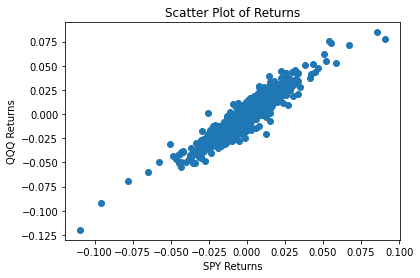

In [ ]:
# Plot the scatter plot
plt.scatter(data["SPY_pct_chg"], data["QQQ_pct_chg"])

# Add labels and title
plt.xlabel("SPY Returns")
plt.ylabel("QQQ Returns")
plt.title("Scatter Plot of Returns")

# Show the plot
plt.show()

# Illustration of presence and absence of the correlation between assets

If there is a strong positive correlation between the two assets, the dots on the scatter plot will tend to fall along a straight line with a positive slope, indicating a strong positive relationship between the two variables. If there is a strong negative correlation, the dots will tend to fall along a straight line with a negative slope, indicating a strong negative relationship. If there is no significant relationship between the two assets, the dots will tend to be scattered randomly across the graph, indicating the absence of a significant relationship between the two variables.

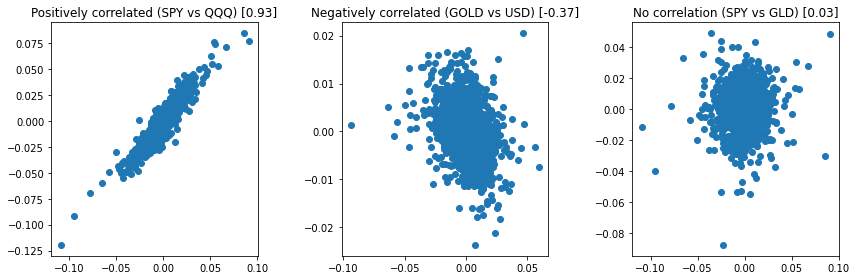

In [ ]:
# create three subplots side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))

# plot the first scatter plot
ax1.scatter(data["SPY_pct_chg"], data["QQQ_pct_chg"])
ax1.set_title(f'Positively correlated (SPY vs QQQ) [{round(data["SPY_pct_chg"].corr(data["QQQ_pct_chg"]), 2)}]')

# plot the second scatter plot
ax2.scatter(data["GCF_pct_chg"], data["DXY_pct_chg"])
ax2.set_title(f'Negatively correlated (GOLD vs USD) [{round(data["GCF_pct_chg"].corr(data["DXY_pct_chg"]), 2)}]')

# plot the third scatter plot
ax3.scatter(data["SPY_pct_chg"], data["GLD_pct_chg"])
ax3.set_title(f'No correlation (SPY vs GLD) [{round(data["SPY_pct_chg"].corr(data["GLD_pct_chg"]), 2)}]')

# adjust the spacing between subplots
plt.tight_layout()

# show the plot
plt.show()

Positively correlated assets are assets whose returns move in the same direction. For example, if one asset increases in value, the other asset is likely to also increase in value. In the above image the first graph shows the correlation between S&P 500 and Nasdaq 100, both the assets have a positive correlation with a coefficient of 0.93 (approx. 1 which means strongly positively correlated). Negatively correlated assets are assets whose returns move in opposite directions. When the price of one asset increases, the price of the other asset decreases, and vice versa. In the above image the second graph shows the correlation between Gold and US dollars, both the assets have a negative correlation with a coefficient of -0.37. Other examples of negatively correlated assets are Stocks vs bonds and Oil vs Stock market. Non-correlated assets are assets whose returns do not move in the same direction. This means that if one asset increases in value, the other asset is not necessarily likely to also increase in value. In the above image the third graph shows the correlation between S&P 500 and Gold, both the assets have no correlation with a coefficient of 0.03.